In [1]:
import numpy as np
import pandas as pd

# Load the datasets

In [2]:
data_dict = {}

In [3]:
task = 'regression'

In [4]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

ds = data['data']
y_feat = data['target_names'][0]
ds[y_feat] = data['target']

data_dict['calhouse'] = {
    'ds': ds,
    'train_feats': data['feature_names'],
    'cat_feats': [],
    'y_feat': y_feat,
    'task': task
}

In [5]:
from sklearn.datasets import load_boston
data = load_boston()

y_feat = 'price'
fs = data['feature_names']
ds = pd.DataFrame(data['data'], columns=fs)
ds[y_feat] =data['target']

data_dict['boston'] = {
    'ds': ds,
    'train_feats': fs,
    'cat_feats': [],
    'y_feat': y_feat,
    'task': task
}

In [6]:
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)

ds = data['data']
y_feat = 'disease'
ds[y_feat] = data['target']

data_dict['diabetes'] = {
    'ds': ds,
    'train_feats': data['feature_names'],
    'cat_feats': [],
    'y_feat': y_feat,
    'task': task
}

In [7]:
task = 'classification'

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -nv
adult_ds = pd.read_csv('adult.data', header=None)
!rm adult.data
fs = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
      'relationship', 'race', 'sex', 'capital-gain', 'capital-loss','hours-per-week','native-country',
      'y']
adult_ds.columns = fs
adult_ds['y_bin'] = (adult_ds['y']==' >50K').astype(int)
cat_feats = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
y_feat = 'y_bin'
train_feats = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-loss','native-country']
adult_ds.drop(train_feats,1)

data_dict['adult'] = {'ds':adult_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:24 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data [3974305/3974305] -> "adult.data" [1]


In [9]:
!wget https://github.com/EgorDudyrev/FCA_BB_interpret/raw/master/datasets/amazon/train.csv -nv
amaz_ds = pd.read_csv('train.csv')
!rm train.csv
y_feat = 'ACTION'
train_feats = ['MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME',
               'ROLE_TITLE','ROLE_FAMILY_DESC','ROLE_FAMILY','ROLE_CODE']
cat_feats = []

data_dict['amazon'] = {'ds':amaz_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:25 URL:https://raw.githubusercontent.com/EgorDudyrev/FCA_BB_interpret/master/datasets/amazon/train.csv [2037893/2037893] -> "train.csv" [1]


In [10]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip -nv
!unzip bank.zip bank-full.csv
bank_ds = pd.read_csv('bank-full.csv', sep=';')
!rm bank-full.csv bank.zip
for f in ['default','housing','loan','y']:
    bank_ds[f] = (bank_ds[f]=='yes').astype(int)
train_feats = ['age','job','marital','education','default','balance',
               'housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
cat_feats = ['job','marital','education','contact','month','poutcome']
y_feat = 'y'
data_dict['bank'] = {'ds':bank_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:28 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip [579043/579043] -> "bank.zip" [1]
Archive:  bank.zip
  inflating: bank-full.csv           


In [11]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data -nv
breast_ds = pd.read_csv('breast-cancer-wisconsin.data', header=None)
!rm breast-cancer-wisconsin.data
fs = ['Sample_code','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
     'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
breast_ds.columns = fs
breast_ds['Bare_Nuclei'] = [int(x) if x!='?' else -1 for x in breast_ds['Bare_Nuclei']]

breast_ds['y'] = (breast_ds['Class']-2)//2
train_feats = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
     'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses',]
cat_feats = []
y_feat = 'y'
data_dict['breast'] = {'ds':breast_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:30 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data [19889/19889] -> "breast-cancer-wisconsin.data" [1]


In [12]:
dss = []
for x in ['cleveland', 'hungarian', 'switzerland', 'va']:
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.{x}.data -nv
    heart_ds = pd.read_csv(f'processed.{x}.data', header=None)
    dss.append(heart_ds)
    !rm processed.{x}.data
heart_ds = pd.concat(dss)
del dss
heart_ds.index = range(len(heart_ds))
fs = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
      'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
train_feats = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
cat_feats = []
heart_ds.columns = fs
for f in ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal']:
    heart_ds[f] = [float(x) if x!='?' else -1 for x in heart_ds[f]] 
heart_ds['has_disease'] = (heart_ds['num']>0).astype(int)
y_feat = 'has_disease'
data_dict['heart'] = {'ds':heart_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:31 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data [18461/18461] -> "processed.cleveland.data" [1]
2021-02-07 11:57:33 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data [10263/10263] -> "processed.hungarian.data" [1]
2021-02-07 11:57:34 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data [4109/4109] -> "processed.switzerland.data" [1]
2021-02-07 11:57:35 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data [6737/6737] -> "processed.va.data" [1]


In [13]:
!wget https://github.com/EgorDudyrev/FCA_BB_interpret/raw/master/datasets/kick/training.csv -nv
kick_ds = pd.read_csv('training.csv')
!rm training.csv

train_feats = ['Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']
cat_feats = ['Auction','VehYear', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size','PRIMEUNIT','AUCGUART',
       'TopThreeAmericanName',  'VNST',]
y_feat = 'IsBadBuy'

kick_ds[cat_feats] = kick_ds[cat_feats].fillna('NONE')
kick_ds[[f for f in kick_ds.columns if f not in cat_feats]] = kick_ds.drop(cat_feats,1).fillna(-1)
data_dict['kick'] = {'ds':kick_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:39 URL:https://raw.githubusercontent.com/EgorDudyrev/FCA_BB_interpret/master/datasets/kick/training.csv [14487324/14487324] -> "training.csv" [1]


In [14]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data -nv
mamm_ds = pd.read_csv('mammographic_masses.data', header=None)
!rm mammographic_masses.data
fs = ['BI-RADS assessment', 'Age', 'Shape', 'Margin', 'Density','Severity']
mamm_ds.columns = fs
for f in fs:
    mamm_ds[f] = [float(x) if x!='?' else -1 for x in mamm_ds[f]]
train_feats = ['BI-RADS assessment','Age','Shape','Margin','Density']
y_feat = 'Severity'
cat_feats = []

data_dict['mammograph'] = {'ds':mamm_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:40 URL:http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data [13450/13450] -> "mammographic_masses.data" [1]


In [15]:
from scipy.io import arff

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00266/seismic-bumps.arff -nv
seism_ds = pd.DataFrame(arff.loadarff('seismic-bumps.arff')[0])
!rm seismic-bumps.arff
seism_ds['class_bin'] = (seism_ds['class']==b'1').astype(int)
train_feats = ['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',]
cat_feats = ['seismic','seismoacoustic','shift','ghazard']
y_feat = 'class_bin'

data_dict['seismic'] = {'ds':seism_ds, 'train_feats':train_feats, 'cat_feats':cat_feats, 'y_feat':y_feat, 'task':task}

2021-02-07 11:57:41 URL:https://archive.ics.uci.edu/ml/machine-learning-databases/00266/seismic-bumps.arff [141669/141669] -> "seismic-bumps.arff" [1]


## Data post-processing

In [16]:
from sklearn.preprocessing import LabelEncoder

for data_name in data_dict.keys():
    ds = data_dict[data_name]['ds']
    cat_feats = data_dict[data_name]['cat_feats']
    ds[cat_feats] = ds[cat_feats].astype(str)
    for f in cat_feats:
        ds[f+'_le'] = LabelEncoder().fit_transform(ds[f])
    data_dict[data_name]['ds'] = ds
    #train_feats_le = [f+('_le' if f in cat_feats else '') for f in train_feats]

# Fit the models

In [17]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [18]:
from fcapy.mvcontext.mvcontext import MVContext
from fcapy.ml.decision_lattice import DecisionLatticeRegressor, DecisionLatticeClassifier
from fcapy.visualizer import visualizer
from fcapy.mvcontext import pattern_structure as PS

In [19]:
from tqdm.notebook import tqdm

In [34]:
RF_PARAMS = dict(n_estimators=10, random_state=42, max_depth=10)

In [35]:
stats = []

for data_name, data in tqdm(data_dict.items()):
    ds, fs, cat_feats, y_feat, task = data['ds'], data['train_feats'], data['cat_feats'], data['y_feat'], data['task']
    fs_le = [str(f if f not in cat_feats else f+'_le') for f in fs]
    
    cls = RandomForestClassifier if task=='classification' else RandomForestRegressor
    rf = cls(**RF_PARAMS)
    rf.fit(ds[fs_le], ds[y_feat])
    dpath_A = rf.decision_path(ds[fs_le])[0]
    
    mvctx = MVContext(
        data = ds[fs_le].values,
        pattern_types={f:PS.IntervalPS for f in fs_le},
        attribute_names=[f for f in fs_le],
        target = ds[y_feat].values,
    )
    
    cls = DecisionLatticeClassifier if task=='classification' else DecisionLatticeRegressor
    dl = cls(
        algo='RandomForest',
        use_generators=False,
        algo_params={'rf_params':RF_PARAMS},
        random_state=RF_PARAMS['random_state'],
    )

    dl.fit(mvctx, use_tqdm=True)
    bottom_concepts, traced_concepts = dl.lattice.trace_context(
        mvctx, use_object_indices=True, use_generators=False)
    
    stat = {}
    stat['data_name'] = data_name
    stat['data_size'] = ds.shape[0]
    
    stat['RF_size'] = dpath_A.shape[1]
    stat['DL_size'] = len(dl.lattice.concepts)-1 # minus bootom/meet concept
    stat['RF_pred_size_mean'] = rf.n_estimators
    stat['RF_pred_size_max'] = rf.n_estimators
    stat['RF_pred_size_min'] = rf.n_estimators
    vals = [len(cs) for cs in bottom_concepts.values()]
    stat['DL_pred_size_mean'] = np.mean(vals)
    stat['DL_pred_size_max'] = np.max(vals)
    stat['DL_pred_size_min'] = np.min(vals)
    vals = dpath_A.sum(1).flatten().tolist()[0]
    stat['RF_trace_size_mean'] = np.mean(vals)
    stat['RF_trace_size_max'] = np.max(vals)
    stat['RF_trace_size_min'] = np.min(vals)
    vals = [len(cs) for cs in traced_concepts.values()]
    stat['DL_trace_size_mean'] = np.mean(vals)
    stat['DL_trace_size_max'] = np.max(vals)
    stat['DL_trace_size_min'] = np.min(vals)
    stats.append(stat)
    pd.concat([pd.Series(s) for s in stats],1).T.write_csv(f'interp_stat_tmp_{RF_PARAMS["n_estimators"]}.csv')
pd.concat([pd.Series(s) for s in stats],1).T.write_csv(f'interp_stat_{RF_PARAMS["n_estimators"]}.csv')
!rm interp_stat_tmp_{RF_PARAMS["n_estimators"]}.csv

# Analysis

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
stat_ds = pd.read_csv(f'interp_stat_10.csv', index_col=0)

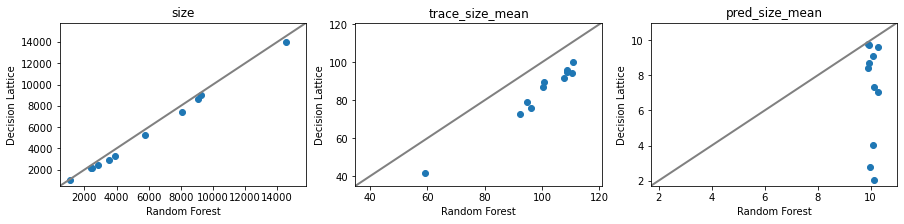

In [38]:
plt.figure(figsize=(15,3))
for idx, fs_type in enumerate(['size', 'trace_size_mean', 'pred_size_mean']):
    plt.subplot(1,3,idx+1)
    
    f1, f2 = 'RF_'+fs_type, 'DL_'+fs_type
    min_ = min(stat_ds[f1].min(), stat_ds[f2].min())*0.9
    max_ = max(stat_ds[f1].max(), stat_ds[f2].max())*1.1
    plt.plot((min_, max_),  (min_, max_), linewidth=2, color='grey')

    jitter = np.random.normal(scale=(max_-min_)/50, size=len(stat_ds))
    
    np.random.seed(42)
    plt.scatter(
        x=stat_ds[f1]+jitter,
        y=stat_ds[f2]+jitter,
    )

    plt.xlim(min_, max_)
    plt.ylim(min_, max_)
    plt.xlabel('Random Forest')
    plt.ylabel('Decision Lattice')
    plt.title(fs_type)
    
plt.show()

In [74]:
for f in ['size','trace_size_mean','pred_size_mean']:
    stat_ds[f"{f}_diff"] = stat_ds[f"RF_{f}"]-stat_ds[f"DL_{f}"]
    stat_ds[f"{f}_diff_perc"] = stat_ds[f"{f}_diff"]/stat_ds[f"RF_{f}"]
    stat_ds[f"{f}_perc"] = stat_ds[f"DL_{f}"]/stat_ds[f"RF_{f}"]*100

In [98]:
cds = stat_ds[['data_name']+[f_ for f in ['size','trace_size_mean','pred_size_mean']
                             for f_ in [f"RF_{f}", f"DL_{f}", f"{f}_perc"]]]
cds.columns = pd.MultiIndex.from_tuples([('data_name',)]+[
    (f,subf) for f in ['size', 'trace_size_mean','pred_size_mean']
     for subf in ['DL','RF','perc']
])
cds = cds.set_index('data_name')
cds.loc['mean'] = cds.mean()
cds = cds.round(2)
cds.index = [f[0] if type(f) is tuple else f for f in cds.index]

In [99]:
cds

size                  trace_size_mean                \
                  DL        RF   perc              DL     RF   perc   
calhouse    14376.00  13835.00  96.24          109.85  99.23  90.33   
boston       3596.00   2994.00  83.26          101.00  89.61  88.73   
diabetes     3706.00   3106.00  83.81           99.24  85.87  86.53   
adult        8634.00   8132.00  94.19          107.78  91.52  84.91   
amazon       5850.00   5297.00  90.55          108.11  92.10  85.20   
bank         9334.00   9075.00  97.23          109.25  96.09  87.95   
breast        588.00    536.00  91.16           56.60  38.85  68.64   
heart        2578.00   2248.00  87.20           91.07  71.69  78.72   
kick         8244.00   7557.00  91.67          109.58  95.85  87.47   
mammograph   2250.00   1982.00  88.09           95.29  75.09  78.80   
seismic      2618.00   2309.00  88.20           95.74  79.97  83.53   
mean         5615.82   5188.27  90.14           98.50  83.26  83.71   

           pred_size_mean               
                       DL    RF   perc  
calhouse             10.0  9.00  89.96  
boston               10.0  2.80  28.02  
diabetes             10.0  1.90  18.98  
adult                10.0  9.36  93.57  
amazon               10.0  8.73  87.32  
bank                 10.0  9.80  97.99  
breast               10.0  6.74  67.37  
heart                10.0  7.21  72.11  
kick                 10.0  9.88  98.76  
mammograph           10.0  3.91  39.09  
seismic              10.0  8.48  84.84  
mean                 10.0  7.07  70.73